In [76]:
import warnings
warnings.filterwarnings('ignore')

In [77]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('benchmarking.csv')

transformations = {
  1: 'cells',
  2: 'cells followed\nby 3 folds',
  3: 'cells followed\nby 9 folds',
  4: '6 folds followed\nby matrix\ntransform',
  5: 'cellular\nautomata'
}

cpu_specs = {
  'justin': 'AMD Ryzen 5900X (gcc)',
  'jakob':  'Intel i7-9750H (gcc)'
}

gpu_specs = {
  'justin': 'Nvidia RTX 3080 (nvc)',
  'jakob':  'Nvidia RTX 2060 Mobile (nvc)'
}

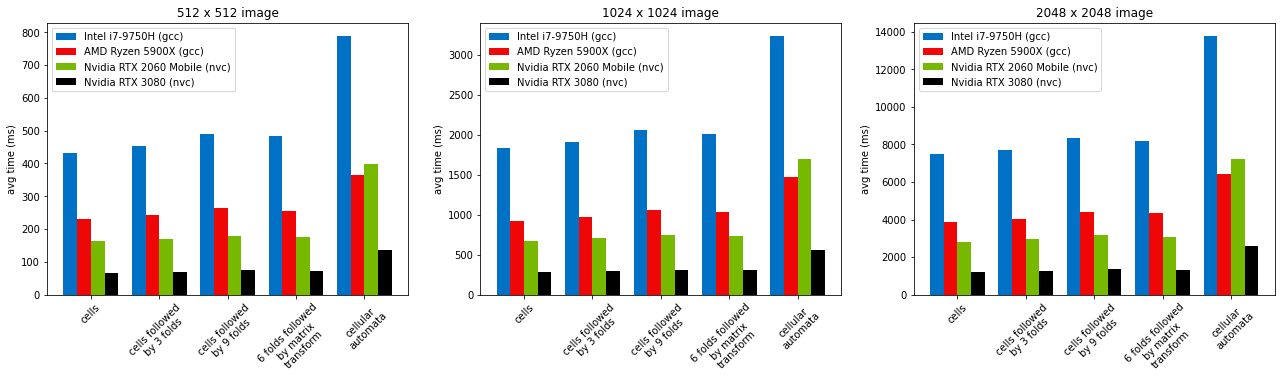

In [78]:
x = transformations.values()
x_axis = np.arange(len(x))

fig, ax = plt.subplots(1, 3)
fig.set_figheight(5)
fig.set_figwidth(22)

img_sizes = [512, 1024, 2048]

for i in range(3):
  img_data = data[data['image_size'] == img_sizes[i]]

  jakob_gcc  = img_data[(img_data['tester'] == 'jakob') & (img_data['compiler'] == 'gcc')]
  justin_gcc = img_data[(img_data['tester'] == 'justin') & (img_data['compiler'] == 'gcc')]
  jakob_nvc  = img_data[(img_data['tester'] == 'jakob') & (img_data['compiler'] == 'nvc')]
  justin_nvc = img_data[(img_data['tester'] == 'justin') & (img_data['compiler'] == 'nvc')]

  ax[i].bar(x_axis - 0.3, jakob_gcc['avg'], 0.2, label = cpu_specs.get('jakob'), color='#0071c5')
  ax[i].bar(x_axis - 0.1, justin_gcc['avg'], 0.2, label = cpu_specs.get('justin'), color='#ef0707')
  ax[i].bar(x_axis + 0.1, jakob_nvc['avg'], 0.2, label = gpu_specs.get('jakob'), color='#76b900')
  ax[i].bar(x_axis + 0.3, justin_nvc['avg'], 0.2, label = gpu_specs.get('justin'), color='#000000')
  
  ax[i].set_xticks(x_axis)
  ax[i].set_xticklabels(x, rotation=45)
  ax[i].set_ylabel('avg time (ms)')
  ax[i].set_title('{} x {} image'.format(img_sizes[i], img_sizes[i]))
  ax[i].legend()
plt.show()

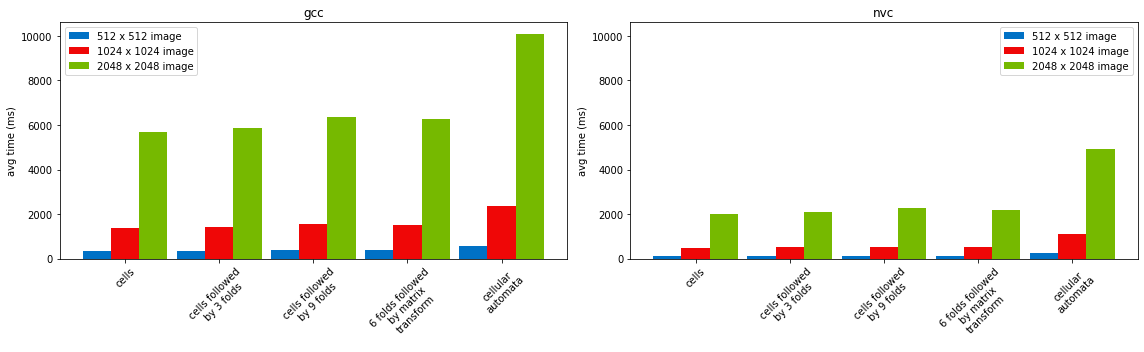

In [126]:
x = transformations.values()
x_axis = np.arange(len(x))

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(16)

compilers = ['gcc', 'nvc']

for i in range(2):
  compiler_data = data[data['compiler'] == compilers[i]]

  img_512  = compiler_data[compiler_data['image_size'] == 512].groupby('transformation_id').mean()
  img_1024 = compiler_data[compiler_data['image_size'] == 1024].groupby('transformation_id').mean()
  img_2048 = compiler_data[compiler_data['image_size'] == 2048].groupby('transformation_id').mean()

  ax[i].bar(x_axis - 0.3, img_512['avg'], 0.3, label = '512 x 512 image', color='#0071c5')
  ax[i].bar(x_axis, img_1024['avg'], 0.3, label = '1024 x 1024 image', color='#ef0707')
  ax[i].bar(x_axis + 0.3, img_2048['avg'], 0.3, label = '2048 x 2048 image', color='#76b900')
  
  ax[i].set_xticks(x_axis)
  ax[i].set_xticklabels(x, rotation=45)
  ax[i].set_ylabel('avg time (ms)')
  ax[i].set_title(compilers[i])
  ax[i].legend()
 
ax[1].sharey(ax[0])
plt.tight_layout()
plt.show()

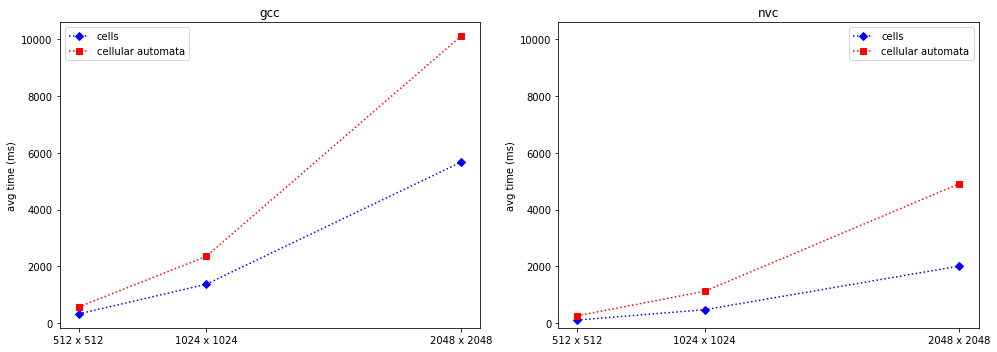

In [121]:
labels = transformations.values()
x = ['512 x 512', '1024 x 1024', '2048 x 2048']
x_axis = [512, 1024, 2048]

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(14)

compilers = ['gcc', 'nvc']

for i in range(2):
  compiler_data = data[data['compiler'] == compilers[i]]

  transform1 = data[(data['compiler'] == compilers[i]) & (data['transformation_id'] == 1)].groupby('image_size').mean()
  transform5 = data[(data['compiler'] == compilers[i]) & (data['transformation_id'] == 5)].groupby('image_size').mean() 

  ax[i].plot(x_axis, transform1['avg'], color='blue', label='cells', marker='D', linestyle='dotted')
  ax[i].plot(x_axis, transform5['avg'], color='red', label='cellular automata', marker='s', linestyle='dotted') 
  
  ax[i].set_xticks(x_axis)
  ax[i].set_xticklabels(x)
  ax[i].set_ylabel('avg time (ms)')
  ax[i].set_title(compilers[i])
  ax[i].legend()
  

ax[1].sharey(ax[0])
plt.tight_layout()
plt.draw()

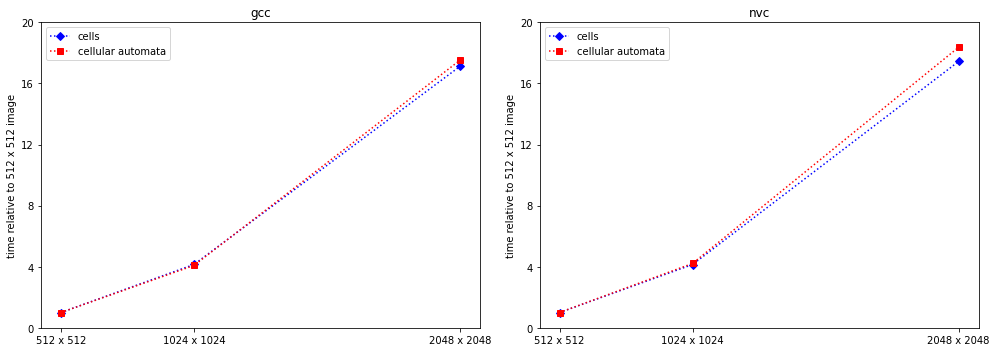

In [127]:
labels = transformations.values()
x = ['512 x 512', '1024 x 1024', '2048 x 2048']
x_axis = [512, 1024, 2048]

fig, ax = plt.subplots(1, 2)
fig.set_figheight(5)
fig.set_figwidth(14)

compilers = ['gcc', 'nvc']

for i in range(2):
  compiler_data = data[data['compiler'] == compilers[i]]

  transform1 = data[(data['compiler'] == compilers[i]) & (data['transformation_id'] == 1)].groupby('image_size').mean()
  transform5 = data[(data['compiler'] == compilers[i]) & (data['transformation_id'] == 5)].groupby('image_size').mean() 

  t1_min = transform1['avg'].min()
  t5_min = transform5['avg'].min()

  ax[i].plot(x_axis, transform1['avg']/t1_min, color='blue', label='cells', marker='D', linestyle='dotted')
  ax[i].plot(x_axis, transform5['avg']/t5_min, color='red', label='cellular automata', marker='s', linestyle='dotted') 
  
  ax[i].set_xticks(x_axis)
  ax[i].set_xticklabels(x)
  ax[i].set_yticks([0, 4, 8, 12, 16, 20])
  ax[i].set_ylabel('time relative to 512 x 512 image')
  ax[i].set_title(compilers[i])
  ax[i].legend()

plt.tight_layout()
plt.draw()